<a href="https://colab.research.google.com/github/raimonizard/python-tensor-flow-image-classification/blob/main/MP15_UF2_D21_Tensorflow_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processament d'imatges amb Tensorflow

## Importem llibreries

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Importem dataset

El dataset d'imatges de roba té 70.000 mostres d'imatges de 28x28 px amb la seva corresponent etiqueta de categorització *(10 categories diferents de roba, 7.000 imatges de cada)*.

Carreguem 60.000 imatges i la seva corresponent categorització *(etiqueta)* com a set de dades d'entrenament i les 10.000 restants per al test.

In [ ]:
roba = keras.datasets.fashion_mnist
(imatges_entrenament, etiquetes_entrenament), (imatges_test, etiquetes_test) = roba.load_data()

## Definim les categories de roba

In [ ]:
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## EDA

In [ ]:
imatges_entrenament.shape

(60000, 28, 28)

In [ ]:
print(imatges_entrenament[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
len(etiquetes_entrenament)

60000

In [ ]:
print(etiquetes_entrenament[0])

9


In [ ]:
print(categories[9])

Ankle boot


In [ ]:
etiquetes_entrenament

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
imatges_test.shape

(10000, 28, 28)

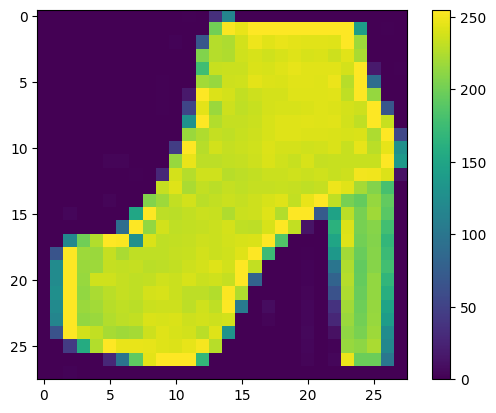

In [ ]:
plt.figure()
plt.imshow(imatges_entrenament[44])
plt.colorbar()
plt.grid(False)
plt.show()

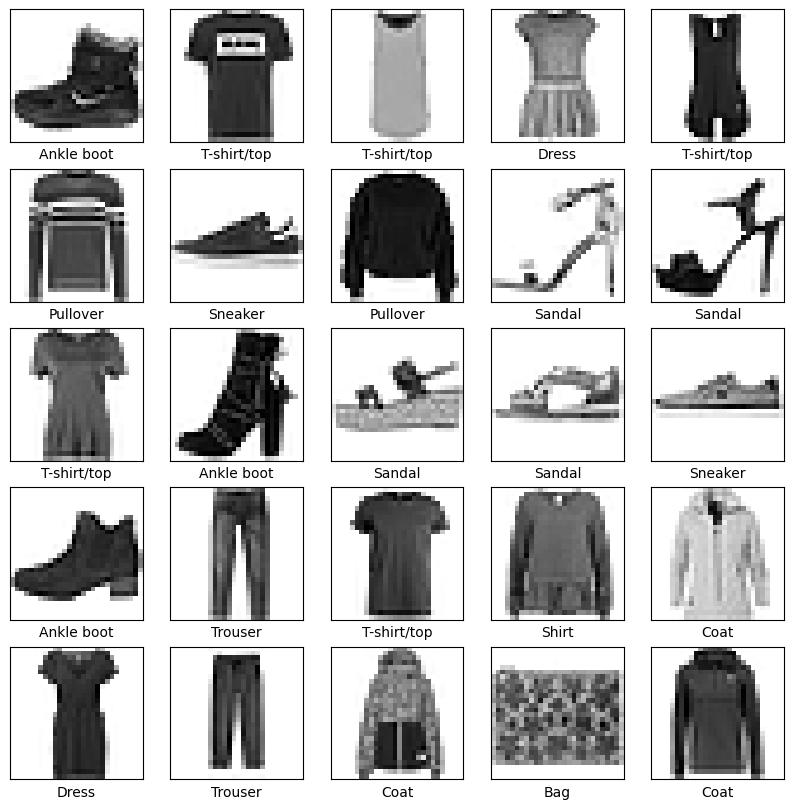

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # Elimina els valors de l'eix X
    plt.yticks([]) # Elimina els valors de l'eix Y
    plt.grid(False)
    plt.imshow(imatges_entrenament[i], cmap=plt.cm.binary)
    plt.xlabel(categories[etiquetes_entrenament[i]])

plt.show()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

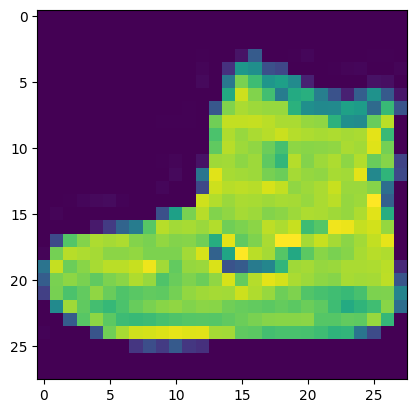

In [ ]:
plt.imshow(imatges_entrenament[0])
print(etiquetes_entrenament[0])
print(imatges_entrenament[0])

Cada imatge és una matriu de valors de píxels entre 0 i 255.

## Preparem les dades

**Normalitem** el valor dels píxels de les imatges entre 0 i 1.

In [ ]:
imatges_entrenament  = imatges_entrenament / 255.0
imatges_test = imatges_test / 255.0

## Definim xarxa neuronal

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Input de dades: especifiquem imatges de 28x28 px
    keras.layers.Dense(128, activation=tf.nn.relu), # Provarem 128 combinacions diferents de paràmetres per a entrenar la xarxa neuronal / "relu" = rectified linear unit (retorna un valor donat si és > 0)
    keras.layers.Dense(10, activation=tf.nn.softmax) # Output: Li demanem que categoritzi les imatges de input en una de les 10 categories de roba que sabem que existeixen en el dataset / softmax es queda amb el valor més gran d'un vector numèric
])

Si afegim més neurones a la xarxa neuronal `keras.layers.Dense(128, activation=tf.nn.relu)` i posem 1024 enlloc de 128, normalment obtindrem millors resultats, però tardarà més.

La capa *(layer)* de resutat sempre ha de tenir el mateix valor que el nombre de categories que estem intentant pronosticar. En el nostre cas **10 categories diferents de roba**.

## Optimitzem el model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Entrenem el model

In [ ]:
# epochs = nombre de vegades que el model intenta encaixar les imatges en cadascuna de les categories
model.fit(imatges_entrenament, etiquetes_entrenament, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5011 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3716 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3354 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3096 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2928 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2788 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9019
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2558 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2469 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2382 - accurac

Si posem un **epoch** més alt, l'entrenament tardarà més però incrementarem l'accuracy.

## Test del model generat

In [ ]:
perdua_test, encert_test = model.evaluate(imatges_test, etiquetes_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8833


In [ ]:
print(perdua_test)
# Percentatge d'encert (per quantes imatges n'ha encertat la categoria)
print(encert_test)

0.34298649430274963
0.8833000063896179


Per tal de reduir la pèrdua, podem provar de entrenar de nou el model incrementant el valor dels **epoch** però no sempre un valor més gran significa menys pèrdua ja que podem caure en el problema de **overfitting** que significa que el nostre model ha "estudiat massa" les imatges del dataset d'entrenament i el soroll de les imatges (píxels de brutícia de les imatges) distorsionen el model entrenat provocant que empitjori al intentar predir imatges noves.

## Prediccions

In [ ]:
prediccio_categories = model.predict(imatges_test)
print(prediccio_categories[9999])
print(etiquetes_test[9999])

313/313 [==============================] - 1s 2ms/step
[9.7194170e-06 5.9157275e-09 1.7260960e-05 1.7436076e-08 1.1159387e-04
 9.9966311e-01 1.0756602e-06 1.6795688e-04 2.9149951e-05 7.7189824e-08]
5


In [ ]:
print(categories[5])

Sandal


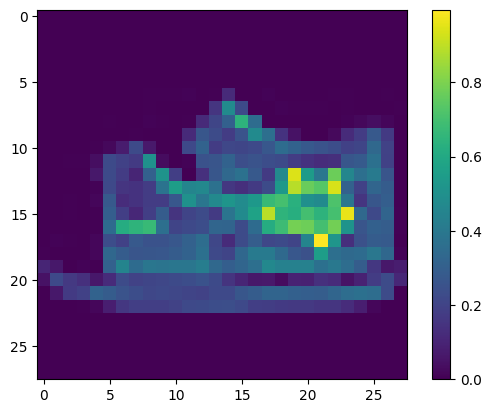

In [ ]:
plt.figure()
plt.imshow(imatges_test[9999])
plt.colorbar()
plt.grid(False)
plt.show()

# Annex

## Entrenar el model fins que arribi al x% accuracy

Definim una funció **callback** per tal de que puguem aturar l'entrenament de la xarxa neuronal un cop s'assoleixi el 90% d'accuracy.

Funciona com un **break**.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.9):
      print("\Hem arribat al 90% accuracy, cancelem entrenament!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

# Definim la xarxa neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Input de dades: especifiquem imatges de 28x28 px
    keras.layers.Dense(512, activation=tf.nn.relu), # Provarem 512 neurones per a entrenar la xarxa neuronal / "relu" = rectified linear unit (retorna un valor donat si és > 0)
    keras.layers.Dense(10, activation=tf.nn.softmax) # Output: Li demanem que categoritzi les imatges de input en una de les 10 categories de roba que sabem que existeixen en el dataset / softmax es queda amb el valor més gran d'un vector numèric
])

# Optimitzem la xarxa neuronal definida
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenem el model amb 15 iteracions i amb el callback per tal de que s'aturi al arribar al 90% accuracy
model.fit(imatges_entrenament, etiquetes_entrenament, epochs=100, callbacks=[callbacks])




Epoch 1/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4799 - accuracy: 0.8299
Epoch 2/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3591 - accuracy: 0.8689
Epoch 3/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3231 - accuracy: 0.8818
Epoch 4/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2990 - accuracy: 0.8895
Epoch 5/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2806 - accuracy: 0.8947
Epoch 6/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2661 - accuracy: 0.8998
Epoch 7/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2516 - accuracy: 0.9057


## Crear convolutional neural networks

En la disciplina del tractament d'imatges per computació, no sempre les dades estan homogeïnitzades (per exemple usen diferents filtres de color, mida, l'objecte d'estudi no es troba al centre de la foto, etc)

Per aquest motiu, pot ser interessant afegir una o dues capes *layers* de pre-processament de les imatges a la nostra xarxa neuronal per tal de que el nostre model tingui millor accuracy.

Per a fer-ho, afegirem les capes de: `tensorflow.keras.layers.Conv2d` i `keras.layers.MaxPooling2D`

In [ ]:
model = keras.Sequential([
    # Li diem que generi 64 filtres d'imatge i que usi per multiplicar les imatges i a través de cada epoch determinar quin filtre
      # ajuda més a determinar la categoria correcte de roba
      # input_shape() serveix per especificar la mida en px de les imatges d'entrada 28x28 px
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    # Capa per comprimir la imatge i ressaltar els punts principals que ajuden a identificar la categoria
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    # Input de dades: especifiquem imatges de 28x28 px
    keras.layers.Flatten(input_shape=(28, 28)),
    # Provarem 512 neurones per a entrenar la xarxa neuronal
      # "relu" = rectified linear unit (retorna un valor donat si és > 0)
    keras.layers.Dense(512, activation=tf.nn.relu),
    # Output: Li demanem que categoritzi les imatges de input en una de les 10 categories de roba que sabem que existeixen en el dataset
      # "softmax" es queda amb el valor més gran d'un vector numèric
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


## Definició de 'layer' en xarxes neuronals

Layer is a general term that applies to a collection of 'nodes' operating together at a specific depth within a neural network.


<[![image](https://i.stack.imgur.com/Kc50L.jpg)](https://i.stack.imgur.com/Kc50L.jpg)

The **input layer** is contains your raw data (you can think of each variable as a 'node').

The **hidden layer(s)** are where the black magic happens in neural networks. Each layer is trying to learn different aspects about the data by minimizing an error/cost function. The most intuitive way to understand these layers is in the context of 'image recognition' such as a face. The first layer may learn edge detection, the second may detect eyes, third a nose, etc. This is not exactly what is happening but the idea is to break the problem up in to components that different levels of abstraction can piece together much like our own brains work (hence the name 'neural networks').

The **output layer** is the simplest, usually consisting of a single output for classification problems. Although it is a single 'node' it is still considered a layer in a neural network as it could contain multiple nodes.

## Definició del 'loss' en xarxes neuronals

A **loss function** measures **how good a neural network model is** in **performing a certain task**, which in most cases is **regression** or **classification**.

**We must minimize the value of the loss function** during the backpropagation step in order to make the neural network better.

# Bibliografia

> [Documentació oficial TensorFlow](https://www.tensorflow.org/tutorials/keras/classification)

> [Vídeo introducció Xarxes Neuronals](https://youtu.be/KNAWp2S3w94?list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO)

> [Vídeo explicació xarxa neuronal amb el dataset de roba](https://youtu.be/bemDFpNooA8?list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO)

> [Vídeo explicació convolutional neural network](https://youtu.be/x_VrgWTKkiM?list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO)

> [Lab2-Computer-Vision (Google Collab)](https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab2-Computer-Vision.ipynb#scrollTo=pkaEHHgqZbYv)

> [Classification (Google Collab)](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb#scrollTo=oZTImqg_CaW1)
